# Iris dataset

[info](https://archive.ics.uci.edu/ml/datasets/iris)

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See **Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis. (Q327.D83) John Wiley & Sons. ISBN 0-471-22361-1. See page 218.**, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

## EDA

In [3]:
iris_df = pd.DataFrame(iris_dataset.data, columns = iris_dataset.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris_df['species'] = iris_dataset.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
# class distribution
print(iris_df.groupby('species').size())

species
0    50
1    50
2    50
dtype: int64


In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<Figure size 720x720 with 0 Axes>

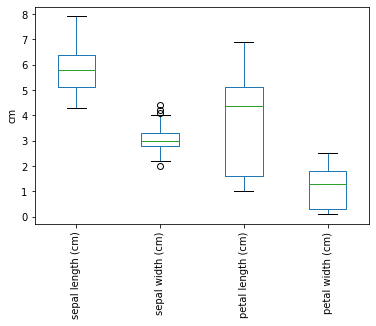

In [8]:
# box and whisker plots
plt.figure(figsize=(10,10))
iris_df.drop('species', axis=1).plot(kind='box', sharex=False, sharey=False)
plt.xticks(rotation = 'vertical')
plt.ylabel('cm')
plt.show();

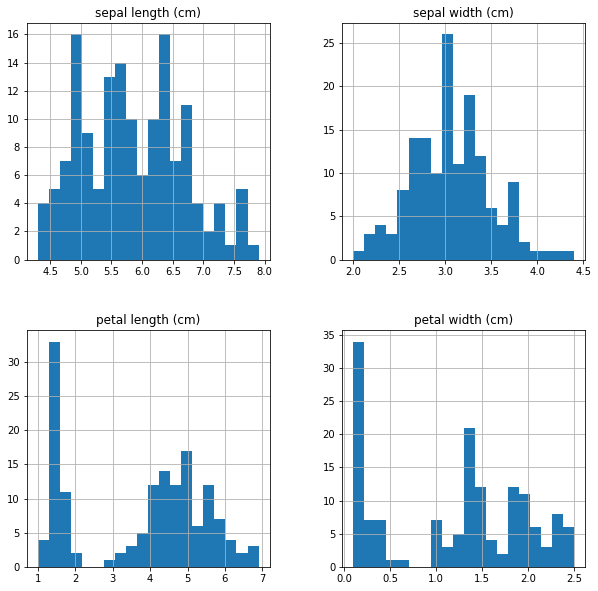

In [77]:
# Visualization
iris_df.drop('species', axis=1).hist(bins=20, figsize=[10,10])
plt.show()

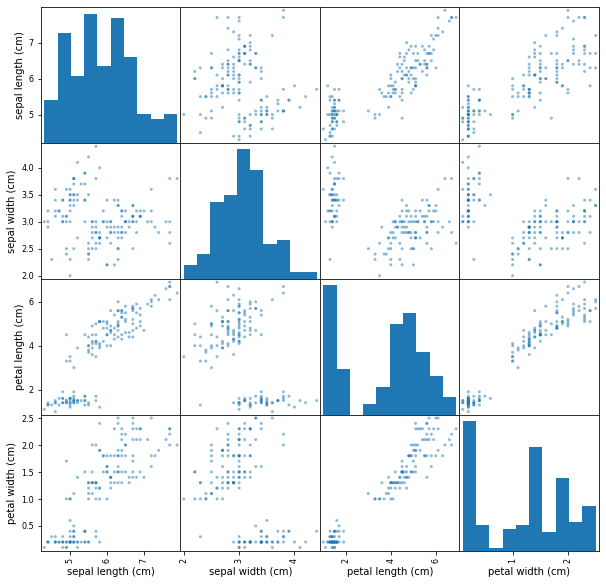

In [48]:
scatter_matrix(iris_df.drop('species', axis=1), figsize=[10,10])
plt.show()

### Using color scales to check for species distribution

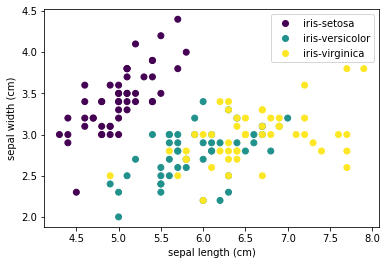

In [10]:
# Visualizing scatters

inv_name_dict = {'iris-setosa': 0,
                 'iris-versicolor': 1,
                 'iris-virginica':2}

scatter = plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'],
                      c = iris_df['species'])

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

# Add legends
plt.legend(handles=scatter.legend_elements()[0], labels = inv_name_dict.keys())

plt.show()

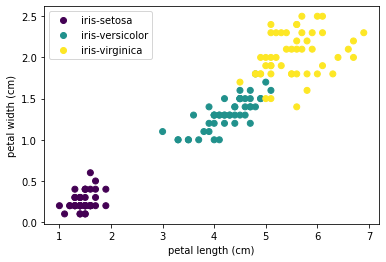

In [11]:
# Using petal features
scatter = plt.scatter(iris_df['petal length (cm)'], iris_df['petal width (cm)'],
                      c = iris_df['species'])

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

# Add legends
plt.legend(handles=scatter.legend_elements()[0], labels = inv_name_dict.keys())

plt.show()

## Using k nearest neighbors

From the previous graph, it appears we can use petal features to train a KNN model, given that species are very clearly clustered together.

### Preparing the data

In [12]:
# Using petal features
X = iris_df[['petal length (cm)', 'petal width (cm)']]
y = iris_df['species']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,
                                                   random_state = 1, stratify = y)

# Stratify to ensure distribution of labels remains similar in both train and test sets

In [14]:
y_train.value_counts()
y_test.value_counts()

2    15
1    15
0    15
Name: species, dtype: int64

## Modelling

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
y_preds = knn.predict(X_test)

In [18]:
y_preds[:5]

array([2, 0, 0, 1, 1])

In [19]:
y_pred_prob = knn.predict_proba(X_test)
y_pred_prob[10:12]

array([[1. , 0. , 0. ],
       [0. , 0.2, 0.8]])

In [20]:
y_preds[10:12]

array([0, 2])

### Accuracy

In [21]:
(y_preds==y_test.values).sum()

44

In [22]:
y_test.size

45

In [23]:
# We made one mistake
# Accuracy is
(y_preds==y_test.values).sum()/y_test.size

0.9777777777777777

In [24]:
# Or, using sklearn:
knn.score(X_test, y_test)

0.9777777777777777

### Confusion matrix

In [25]:
confusion_matrix(y_test,y_preds)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

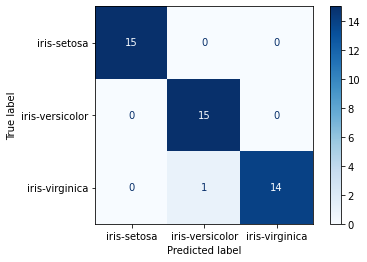

In [26]:
# Visualizing

plot_confusion_matrix(knn,X_test,y_test, display_labels=['iris-setosa','iris-versicolor','iris-virginica'], cmap=plt.cm.Blues)

### K-fold cross validation

In [27]:
# create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

In [28]:
# train with a 5-fold cv
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

In [29]:
# Each of the holdouts contains 20% of the original data

# Print each cv score (accuracy)

print(cv_scores)

[0.96666667 0.96666667 0.9        0.93333333 1.        ]


In [30]:
# Mean of model fitting with cv
cv_scores.mean()

0.9533333333333334

### Grid search

* k is a hyperparameter. Finding the optimal k is called tuning the hyperparameter.

* We can do this with grid search, which trains the model multiple times on a range of values for the hyperparameters specified with `param_grid` and computes cross validation scores.

In [31]:
# create a new model
knn2 = KNeighborsClassifier()

# create a dict of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2,10)}

# Use grid search to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv = 5)

# fit the model to data
knn_gscv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [32]:
# Checking the top performing values
knn_gscv.best_params_

{'n_neighbors': 4}

In [33]:
# Accuracy when at best parameters
knn_gscv.best_score_

0.9666666666666668

#### Building the final model with best parameters

In [34]:
knn_final = KNeighborsClassifier(n_neighbors = knn_gscv.best_params_['n_neighbors'])
knn_final.fit(X,y)

y_preds = knn_final.predict(X)

knn_final.score(X,y)

0.9733333333333334

## Ready to deploy and make predictions with new data

We take some measurements of an iris and record that the length and width of its sepal are 5.84 cm and 3.06 cm, respectively, and the length and width of its petal are 3.76 cm and 1.20 cm, respectively. How do we make a prediction using the built model?

In [35]:
# Remember our model needs a 2D object, so we use double []
new_data = np.array([[3.76, 1.20]])

Making a label prediction:

In [36]:
knn_final.predict(new_data)

array([1])

### Probability prediction with new data

Let's collect more data: three plants of iris share the same petal width, 2.25cm, but are different in the length of the petal: 5.03 cm, 3.85 cm, and 1.77 cm, respectively. We store the new data into a 2D array as follows:

In [37]:
new_data = np.array([[3.76,1.2],[5.25,1.2],[1.58,1.2]])

In [38]:
# Making a simple prediction
knn_final.predict(new_data)

array([1, 2, 0])

In [39]:
# Probabilities
knn_final.predict_proba(new_data)

array([[0.  , 1.  , 0.  ],
       [0.  , 0.25, 0.75],
       [1.  , 0.  , 0.  ]])

Each row sums to 1. Take the second iris, our model predicts that there is a probability of 25% that the iris would be versicolor, and 75% virginica. This is consistent with the label prediction: virginica.

# Testing different classification models

How good is our model? We have seen that KNN works well because there is a clear clustering of species when we look at petal features. However, from the scatter_matrix, it appears some species are lineraly separable in some dimension.

To check performance of different approaches, we will test 5 other models:

* Logistic Regression ([LR](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression))
* Linear Discriminant Analysis ([LDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html?highlight=linear%20discriminant%20analysis#sklearn.discriminant_analysis.LinearDiscriminantAnalysis))
* Classification and Regression Trees ([CAR](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree%20classifier#sklearn.tree.DecisionTreeClassifier)).
* Gaussian Naive Bayes ([NB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?highlight=gaussian%20naive#sklearn.naive_bayes.GaussianNB).)
* Support Vector Machines ([SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC)).

The first two models are simple linear algorithms ([Linear Algorithms](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)) while the last 3 are nonlinear.

In [49]:
# Importing what we'll need for this section
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Let's split our data set again, to keep our code self-contained in this section.

In [56]:
# Using all features
X = iris_df.drop('species', axis = 1)
y = iris_df['species']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,
                                                   random_state = 1, stratify = y)

In [67]:
# Create dictionary with all models to use
models = {'LR':   LogisticRegression(solver='liblinear', multi_class='ovr'),
          'LDA':  LinearDiscriminantAnalysis(),
          'KNN':  KNeighborsClassifier(),
          'CART': DecisionTreeClassifier(),
          'NB':   GaussianNB(),
          'SVM':  SVC(gamma='auto')
         }


results = {}
box_results =[]

for name, model in models.items():
    kfold = StratifiedKFold(n_splits = 10, random_state=1, shuffle= True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results[name] = cv_results.mean()
    box_results.append(cv_results)
    
print(results)

{'LR': 0.9583333333333333, 'LDA': 0.975, 'KNN': 0.95, 'CART': 0.925, 'NB': 0.95, 'SVM': 0.9666666666666666}


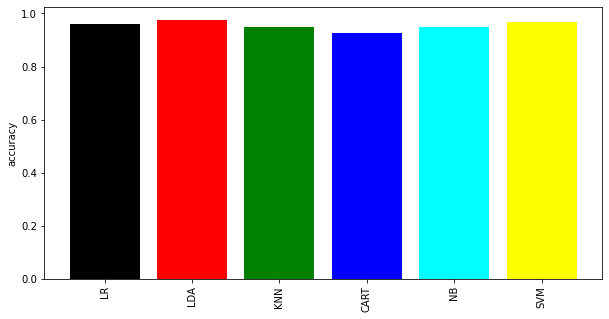

In [68]:
cores = ['black', 'red', 'green', 'blue', 'cyan', 'yellow']
plt.figure(figsize=(10,5))
plt.bar(results.keys(), results.values(), color = cores)
plt.xticks(rotation='vertical')
plt.ylabel('accuracy')
plt.show()

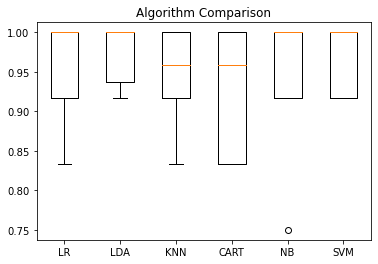

In [69]:
# Compare Algorithms
plt.boxplot(box_results, labels=models.keys())
plt.title('Algorithm Comparison')
plt.show()


### Making predicitions with best socring model

In [70]:
model = LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

### Evaluating the model

In [72]:
# Evaluate predictions
print(accuracy_score(y_test, y_preds))

1.0


In [73]:
print(confusion_matrix(y_test, y_preds))

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


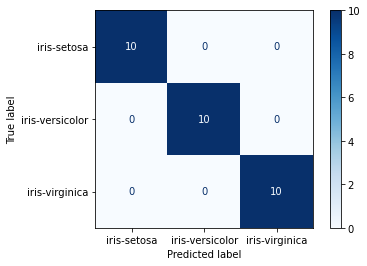

In [74]:
# Visualizing

plot_confusion_matrix(model,X_test,y_test, display_labels=['iris-setosa','iris-versicolor','iris-virginica'], cmap=plt.cm.Blues)

In [75]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Using LDA we achieved 100% accuracy for this model!

**Results may vary given the stochastic nature of the algorithm or evaluation procedure, or differences in numerical precision. Consider running the example a few times and compare the average outcome.**